In [45]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [22]:
from google.colab import files
uploaded = files.upload()

Saving german_credit_data.csv to german_credit_data.csv


In [31]:
df = pd.read_csv("german_credit_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [32]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Housing'] = encoder.fit_transform(df['Housing'])
df['Saving accounts'] = encoder.fit_transform(df['Saving accounts'])
df['Checking account'] = encoder.fit_transform(df['Checking account'])
df['Purpose'] = encoder.fit_transform(df['Purpose'])
df['Risk'] = encoder.fit_transform(df['Risk'])

In [33]:
X = df.drop('Risk', axis=1)
Y = df['Risk']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=0)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
rf_classifier = RandomForestClassifier(max_depth=2, random_state=0)
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)

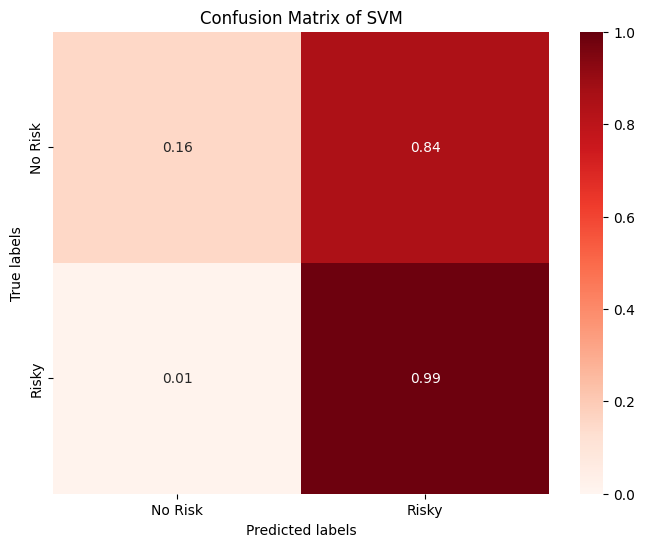

Confusion Matrix%:
 [[0.15517241 0.84482759]
 [0.01408451 0.98591549]]


In [47]:
cm = confusion_matrix(Y_test, y_pred)
cm_percent = cm / cm.sum(axis=1)[:, np.newaxis]
cmap = sns.color_palette("Reds", as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap=cmap, vmax=1.0, vmin=0.0)
plt.xticks(ticks=[0.5, 1.5], labels=["No Risk", "Risky"])
plt.yticks(ticks=[0.5, 1.5], labels=["No Risk", "Risky"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVM')
plt.show()
print("Confusion Matrix%:\n", cm_percent)

In [48]:
score = accuracy_score(y_pred, Y_test)
f1 = f1_score(Y_test, y_pred)
print("Accuracy:", score)
print("F1-score:", f1)
print(classification_report(Y_test, y_pred))

Accuracy: 0.745
F1-score: 0.8459214501510574
              precision    recall  f1-score   support

           0       0.82      0.16      0.26        58
           1       0.74      0.99      0.85       142

    accuracy                           0.74       200
   macro avg       0.78      0.57      0.55       200
weighted avg       0.76      0.74      0.68       200

